In [18]:
pip install transformers torchvision torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [19]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [20]:
# Cargar modelo y procesador
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [ ]:
# Cargar imagen del cliente
image = Image.open("../data/5_image_women_fringe.jpg").convert("RGB")
prompt = "hair" 

In [22]:
# Preparar inputs
inputs = processor(text=prompt, images=image, return_tensors="pt")

In [23]:
# Inferencia
with torch.no_grad():
    outputs = model(**inputs)

In [24]:
# Obtener máscara
pred_mask = torch.sigmoid(outputs.logits)[0]  # shape: [1, 352, 352]
pred_mask = pred_mask.squeeze().cpu().numpy() 
binary_mask = (pred_mask > 0.5).astype("float32")
inverted_mask = 1.0 - binary_mask

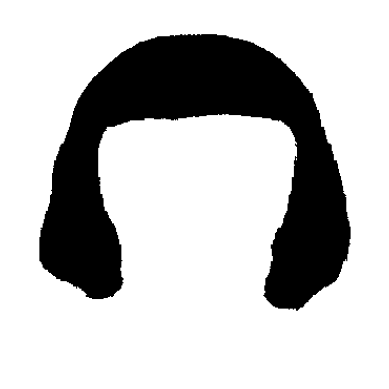

In [25]:
# Mostrar máscara
plt.imshow(inverted_mask, cmap="gray")
plt.axis("off")
plt.show()

In [26]:
# Convertir a imagen PIL y guardar
to_pil_image(torch.tensor(inverted_mask)).save("../data/5_mask_clipseg.png")
